# 1. Imports

`imports`, you've seen this before!

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime
import geopy
from geopy.geocoders import Nominatim
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point, Polygon

Some magic that tells jupyter to put graphs and things in the notebook instead of the default behaviour which is to save it as a file.

In [2]:
%matplotlib inline

# 2. Read in the csv file

In [3]:
if os.path.isfile("international_air_traffic_data_set.csv"):
    filepath = "international_air_traffic_data_set.csv"
    print("loading from file")
else:
    filepath = "https://data.gov.au/data/dataset/d9fbffaa-836f-4f52-80e8-324249ff269f/resource/ebcafd83-9514-4f72-a995-fe7ee90cb9da/download/city_pairs.csv"
    print("loading from the internet")

international_air_traffic_data_set = pd.read_csv(filepath)
print("done")

loading from file
done


Read the data frame as df

In [4]:
df = pd.read_csv("international_air_traffic_data_set.csv")
df.head()

Month AustralianPort ForeignPort      Country  Passengers_In  \
0  31048       Adelaide    Auckland  New Zealand         1513.0   
1  31048       Adelaide     Bahrain      Bahrain           12.0   
2  31048       Adelaide      Bombay        India            7.0   
3  31048       Adelaide   Frankfurt      Germany          115.0   
4  31048       Adelaide      London           UK         1567.0   

   Freight_In_(tonnes)  Mail_In_(tonnes)  Passengers_Out  \
0               42.167             0.311           985.0   
1                0.000             0.000             5.0   
2                0.000             0.000             5.0   
3                0.009             0.000           171.0   
4                2.800             0.000          1472.0   

   Freight_Out_(tonnes)  Mail_Out_(tonnes)  Passengers_Total  \
0                18.704              0.924            2498.0   
1                 0.033              0.000              17.0   
2                 0.000              0.000              12.0   
3                 0.000              0.248             286.0   
4                10.618              2.487            3039.0   

   Freight_Total_(tonnes)  Mail_Total_(tonnes)  Year  Month_num  
0                  60.871                1.235  1985          1  
1                   0.033                0.000  1985          1  
2                   0.000                0.000  1985          1  
3                   0.009                0.248  1985          1  
4                  13.418                2.487  1985          1

# Info about the data frame

looking at the info for the code - are there any null values? what are the objects type?

In [399]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82499 entries, 0 to 82498
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Month                   82499 non-null  int64  
 1   AustralianPort          82499 non-null  object 
 2   ForeignPort             82499 non-null  object 
 3   Country                 82499 non-null  object 
 4   Passengers_In           82487 non-null  float64
 5   Freight_In_(tonnes)     82495 non-null  float64
 6   Mail_In_(tonnes)        82495 non-null  float64
 7   Passengers_Out          82489 non-null  float64
 8   Freight_Out_(tonnes)    82495 non-null  float64
 9   Mail_Out_(tonnes)       82495 non-null  float64
 10  Passengers_Total        82489 non-null  float64
 11  Freight_Total_(tonnes)  82499 non-null  float64
 12  Mail_Total_(tonnes)     82499 non-null  float64
 13  Year                    82499 non-null  int64  
 14  Month_num               82499 non-null

Tells you how many items are in each YEAR

In [400]:
df.groupby("Year").size()

Year
1985    1944
1986    2224
1987    2284
1988    2361
1989    2369
1990    2471
1991    2281
1992    2469
1993    2656
1994    2600
1995    2807
1996    3035
1997    3157
1998    3162
1999    3407
2000    3502
2001    2970
2002    2769
2003    1820
2004    1877
2005    1898
2006    1830
2007    1824
2008    1792
2009    1738
2010    1791
2011    1875
2012    1808
2013    1848
2014    1786
2015    1828
2016    1949
2017    2106
2018    2240
2019    2219
2020    1373
2021     429
dtype: int64

Tells you how many items are in each DOMESTIC PORT

Highest to lowest

In [401]:
df.AustralianPort.value_counts(dropna=False)

Sydney                    22911
Melbourne                 16471
Brisbane                  13628
Perth                      8890
Cairns                     6752
Adelaide                   5967
Darwin                     4383
Gold Coast                  970
Townsville                  660
Gold Coast/Coolangatta      503
Norfolk Island              418
Hobart                      319
Port Hedland                286
Canberra                     94
Christmas Island             80
Toowoomba Wellcamp           64
Broome                       37
Sunshine Coast               37
Newcastle                    18
GoldCoast                     8
NorfolkIsland                 1
PortHedland                   1
ToowoombaWellcamp             1
Name: AustralianPort, dtype: int64

Tells you how many items are in each FOREIGN PORT

Highest to lowest

In [12]:
df.ForeignPort.value_counts(dropna=False)

Auckland        3460
Singapore       3253
Denpasar        2992
Hong Kong       2793
Kuala Lumpur    2505
Name: ForeignPort, dtype: int64

Tells you how many items are in each FOREIGN PORT

Alphabetical

In [403]:
df.groupby("ForeignPort").size()

ForeignPort
Abu Dhabi    808
AbuDhabi       3
Abuja          3
Al Ain         1
Almaty        17
            ... 
Xi'an         81
Xiamen       111
Zagreb        22
Zhengzhou     46
Zurich       128
Length: 203, dtype: int64

This Function looks up a country in the data frame

In [404]:
df.loc[df['Country'] == "Japan"]

Month AustralianPort ForeignPort Country  Passengers_In  \
31     31048       Brisbane       Tokyo   Japan          536.0   
86     31048      Melbourne       Tokyo   Japan          228.0   
108    31048          Perth       Tokyo   Japan           55.0   
152    31048         Sydney       Tokyo   Japan         5949.0   
192    31079       Brisbane       Tokyo   Japan          455.0   
...      ...            ...         ...     ...            ...   
82409  44287       Brisbane       Tokyo   Japan            0.0   
82414  44287         Cairns       Tokyo   Japan            0.0   
82443  44287      Melbourne       Tokyo   Japan            0.0   
82479  44287         Sydney      Nagoya   Japan            0.0   
82493  44287         Sydney       Tokyo   Japan          789.0   

       Freight_In_(tonnes)  Mail_In_(tonnes)  Passengers_Out  \
31                   4.085             0.000           384.0   
86                  42.059             1.404           333.0   
108                  3.004             0.000            35.0   
152                313.350            15.190          5993.0   
192                  7.364             0.000           206.0   
...                    ...               ...             ...   
82409               39.567            41.454             0.0   
82414                0.000             0.000             0.0   
82443               89.343            10.888             0.0   
82479                0.000             0.000             0.0   
82493              518.853            55.656           888.0   

       Freight_Out_(tonnes)  Mail_Out_(tonnes)  Passengers_Total  \
31                    4.713              0.212             920.0   
86                   15.395              0.892             561.0   
108                  13.661              0.262              90.0   
152                 185.748              5.289           11942.0   
192                   5.626              0.312             661.0   
...                     ...                ...               ...   
82409               139.605             17.499               0.0   
82414                 0.006              0.000               0.0   
82443               207.554              3.199               0.0   
82479                 0.000              0.000               0.0   
82493               668.092             15.402            1677.0   

       Freight_Total_(tonnes)  Mail_Total_(tonnes)  Year  Month_num  
31                      8.798                0.212  1985          1  
86                     57.454                2.296  1985          1  
108                    16.665                0.262  1985          1  
152                   499.098               20.479  1985          1  
192                    12.990                0.312  1985          2  
...                       ...                  ...   ...        ...  
82409                 179.172               58.953  2021          4  
82414                   0.006                0.000  2021          4  
82443                 296.897               14.087  2021          4  
82479                   0.000                0.000  2021          4  
82493                1186.945               71.058  2021          4  

[5533 rows x 15 columns]

This Function looks up a country in the data frame

In [405]:
Look_up_a_Country = df[((df.Country == "Japan"))]
Look_up_a_Country

Month AustralianPort ForeignPort Country  Passengers_In  \
31     31048       Brisbane       Tokyo   Japan          536.0   
86     31048      Melbourne       Tokyo   Japan          228.0   
108    31048          Perth       Tokyo   Japan           55.0   
152    31048         Sydney       Tokyo   Japan         5949.0   
192    31079       Brisbane       Tokyo   Japan          455.0   
...      ...            ...         ...     ...            ...   
82409  44287       Brisbane       Tokyo   Japan            0.0   
82414  44287         Cairns       Tokyo   Japan            0.0   
82443  44287      Melbourne       Tokyo   Japan            0.0   
82479  44287         Sydney      Nagoya   Japan            0.0   
82493  44287         Sydney       Tokyo   Japan          789.0   

       Freight_In_(tonnes)  Mail_In_(tonnes)  Passengers_Out  \
31                   4.085             0.000           384.0   
86                  42.059             1.404           333.0   
108                  3.004             0.000            35.0   
152                313.350            15.190          5993.0   
192                  7.364             0.000           206.0   
...                    ...               ...             ...   
82409               39.567            41.454             0.0   
82414                0.000             0.000             0.0   
82443               89.343            10.888             0.0   
82479                0.000             0.000             0.0   
82493              518.853            55.656           888.0   

       Freight_Out_(tonnes)  Mail_Out_(tonnes)  Passengers_Total  \
31                    4.713              0.212             920.0   
86                   15.395              0.892             561.0   
108                  13.661              0.262              90.0   
152                 185.748              5.289           11942.0   
192                   5.626              0.312             661.0   
...                     ...                ...               ...   
82409               139.605             17.499               0.0   
82414                 0.006              0.000               0.0   
82443               207.554              3.199               0.0   
82479                 0.000              0.000               0.0   
82493               668.092             15.402            1677.0   

       Freight_Total_(tonnes)  Mail_Total_(tonnes)  Year  Month_num  
31                      8.798                0.212  1985          1  
86                     57.454                2.296  1985          1  
108                    16.665                0.262  1985          1  
152                   499.098               20.479  1985          1  
192                    12.990                0.312  1985          2  
...                       ...                  ...   ...        ...  
82409                 179.172               58.953  2021          4  
82414                   0.006                0.000  2021          4  
82443                 296.897               14.087  2021          4  
82479                   0.000                0.000  2021          4  
82493                1186.945               71.058  2021          4  

[5533 rows x 15 columns]

Goes through all the rows in foreign port and prints them

In [406]:
for index, row in df.iterrows():
    print(index, row['ForeignPort'])

0 Auckland
1 Bahrain
2 Bombay
3 Frankfurt
4 London
5 Muscat
6 Rome
7 Singapore
8 Abu Dhabi
9 Auckland
10 Bahrain
11 Bangkok
12 Bombay
13 Christchurch
14 Frankfurt
15 Hong Kong
16 Honiara
17 Honolulu
18 Kuala Lumpur
19 London
20 Los Angeles
21 Manila
22 Muscat
23 Nadi
24 Noumea
25 Port Moresby
26 Port Vila
27 Rome
28 San Francisco
29 Singapore
30 Suva
31 Tokyo
32 Vancouver
33 Wellington
34 Honolulu
35 Los Angeles
36 Port Moresby
37 San Francisco
38 Vancouver
39 Auckland
40 Bahrain
41 Bandar Seri Begawan
42 Bombay
43 Denpasar
44 Frankfurt
45 Jakarta
46 London
47 Rome
48 Singapore
49 Christchurch
50 Abu Dhabi
51 Amsterdam
52 Athens
53 Auckland
54 Bahrain
55 Bandar Seri Begawan
56 Bangkok
57 Beijing
58 Belgrade
59 Bombay
60 Christchurch
61 Colombo
62 Denpasar
63 Dubai
64 Frankfurt
65 Hong Kong
66 Honolulu
67 Houston
68 Jakarta
69 Kuala Lumpur
70 Larnaca
71 London
72 Los Angeles
73 Manchester
74 Manila
75 Mauritius
76 Muscat
77 Nadi
78 Nauru
79 New York
80 Noumea
81 Papeete
82 Port Vila
83 

items that have a space in them

In [407]:
df.loc[df["ForeignPort"].str.contains(" ")]

# for items that dont have a space in them
# df.loc[~df["ForeignPort"].str.contains(" ")] 

Month      AustralianPort    ForeignPort               Country  \
8      31048            Brisbane      Abu Dhabi  United Arab Emirates   
15     31048            Brisbane      Hong Kong             Hong Kong   
18     31048            Brisbane   Kuala Lumpur              Malaysia   
20     31048            Brisbane    Los Angeles                   USA   
25     31048            Brisbane   Port Moresby      Papua New Guinea   
...      ...                 ...            ...                   ...   
82481  44287              Sydney      New Delhi                 India   
82482  44287              Sydney       New York                   USA   
82484  44287              Sydney   Port Moresby      Papua New Guinea   
82486  44287              Sydney  San Francisco                   USA   
82497  44287  Toowoomba Wellcamp      Hong Kong       Hong Kong (SAR)   

       Passengers_In  Freight_In_(tonnes)  Mail_In_(tonnes)  Passengers_Out  \
8                0.0                0.000             0.000             3.0   
15            1911.0                9.352             0.000          1163.0   
18              45.0                0.100             0.000            38.0   
20              57.0                2.796             0.000             0.0   
25            2011.0               20.256             0.448          1917.0   
...              ...                  ...               ...             ...   
82481          257.0               20.507            30.919           133.0   
82482            0.0              197.736             4.116             0.0   
82484           97.0                0.383             0.000            24.0   
82486          598.0              265.689            89.816           913.0   
82497            0.0                3.000             0.000             0.0   

       Freight_Out_(tonnes)  Mail_Out_(tonnes)  Passengers_Total  \
8                     0.000              0.000               3.0   
15                   38.950              0.014            3074.0   
18                    0.100              0.000              83.0   
20                    0.000              0.000              57.0   
25                   33.194              2.643            3928.0   
...                     ...                ...               ...   
82481                16.158              0.000             390.0   
82482                 0.000              0.000               0.0   
82484                 0.504              0.000             121.0   
82486               513.851             44.825            1511.0   
82497               173.042              0.000               0.0   

       Freight_Total_(tonnes)  Mail_Total_(tonnes)  Year  Month_num  
8                       0.000                0.000  1985          1  
15                     48.302                0.014  1985          1  
18                      0.200                0.000  1985          1  
20                      2.796                0.000  1985          1  
25                     53.450                3.091  1985          1  
...                       ...                  ...   ...        ...  
82481                  36.665               30.919  2021          4  
82482                 197.736                4.116  2021          4  
82484                   0.887                0.000  2021          4  
82486                 779.540              134.641  2021          4  
82497                 176.042                0.000  2021          4  

[16312 rows x 15 columns]

# Useful Groupings

Groups the data by DOMESTIC Airport

In [408]:
for group_key, group_value in df.groupby("AustralianPort"):
    print(group_key)
    print(group_value)

Adelaide
       Month AustralianPort   ForeignPort          Country  Passengers_In  \
0      31048       Adelaide      Auckland      New Zealand         1513.0   
1      31048       Adelaide       Bahrain          Bahrain           12.0   
2      31048       Adelaide        Bombay            India            7.0   
3      31048       Adelaide     Frankfurt          Germany          115.0   
4      31048       Adelaide        London               UK         1567.0   
...      ...            ...           ...              ...            ...   
82285  44256       Adelaide     Singapore        Singapore         1067.0   
82391  44287       Adelaide          Doha            Qatar          876.0   
82392  44287       Adelaide     Hong Kong  Hong Kong (SAR)            0.0   
82393  44287       Adelaide  Kuala Lumpur         Malaysia          199.0   
82394  44287       Adelaide     Singapore        Singapore          723.0   

       Freight_In_(tonnes)  Mail_In_(tonnes)  Passengers_Out  \
0 

Groups the data frame by year

In [ ]:
for group_key, group_value in df.groupby("Year"):
    print(group_key)
    print(group_value)

Creates a list of the FOREIGN PORTS

In [ ]:
list(df.groupby("ForeignPort"))

Shows the first and last year that an airport had been used

In [ ]:
df.groupby("AustralianPort").agg({"Year" : ["count", "min", "max"]})

Shows the min and max of each country and how many times it appears

In [ ]:
df.groupby(['Country']).Passengers_Total.agg(["count", min, max])

Shows the first and last year that a country had been travelled to

In [ ]:
df.groupby("ForeignPort").agg({"Year" : ["count", "min", "max"]})

SPECIFIC AIRPORT, MONTH AND YEAR

Shows all the travel in January 2016 from Sydney

In [ ]:
a = df[(df.Year == 2016) & ((df.AustralianPort == "Sydney")) & ((df.Month_num == 1))]
a

Groups the data frame by year and australian airport

then it tells you how many times the foriegn airport appears in that year

In [ ]:
df.groupby(["Year", "AustralianPort", "ForeignPort"]).size()

Year  AustralianPort      ForeignPort
1985  Adelaide            Abu Dhabi       8
                          Amsterdam       3
                          Auckland       12
                          Bahrain        12
                          Bangkok         1
                                         ..
2021  Sydney              Vancouver       4
                          Wellington      1
                          Xiamen          4
      Toowoomba Wellcamp  Hong Kong       4
                          Singapore       4
Length: 8683, dtype: int64

Just shows a DATAFRAME with relevant infomration on PASSENGERS

In [ ]:
df[["Year", "AustralianPort", "ForeignPort", "Country", "Passengers_In", "Passengers_Out", "Passengers_Total"]]

SHOWS cells with BOTH "USA" and "SYDNEY" in it

boolean indexing 

Just shows a DATAFRAME with relevant infomration on PASSENGERS

In [ ]:
dfa = df[["Year", "AustralianPort", "ForeignPort", "Country", "Passengers_In", "Passengers_Out", "Passengers_Total"]]
Sydney = dfa[(dfa.AustralianPort == "Sydney") & (dfa.Country == "USA")]
Sydney.sort_values(by=["Passengers_Total", "AustralianPort"])
Sydney.tail()

# 3. Get long and lat

This goes to the internet and grabs the long and lat for the cities

Grabs the unique items from the column we just made

In [ ]:
#import all these - in the link it shows you how to install them
import pandas as pd
import geopy
from geopy.geocoders import Nominatim

#I don't really understand code but this line makes it all work
geolocator = Nominatim(timeout=10, user_agent = "myGeolocator")

#This is just me reading in my data frame
df = pd.read_csv("international_air_traffic_data_set.csv")

# This concatinates the columns for city name and country - e.g. Auckland, New Zealand

df["full_address"] = df.ForeignPort + ", " + df.Country

# My data frame has over 82000 rows, so I only want to look for the unique cities because there are only 203
# therefore less time waiting for all the data to load
unique_ports = df.full_address.unique()

# here im creating "buckets" or "empty lists" to fill in the data that comes back from the api
lat = []
lon = []
ports = []
locations = []

# This loop goes through each city in the "unique cities" list and get the geocode data from the internet
for port in unique_ports:
    try:
        location = geolocator.geocode(port)
        lat.append(location.latitude)
        lon.append(location.longitude)
        locations.append(location)
        ports.append(port)
        print(location.longitude, location.latitude)
    except:
        # i put in an except loop because sometimes the api doesnt recognise a city name
        # if it return no value then it prints the name of the city it couldnt find
        # im having some trouble at the moment with cases its getting confused somewhere along the way
        # It doesnt like "NewYork" it likes "New York" it has to have a space - somewhere my code is removing the space
        if location == None:
            # by printing "port" you can see which cities it cant find
            print(port)
# this bit takes those lists from above and puts them in a dictionary
di = {"port":ports, "locations":locations, "latitude":lat, "longitude":lon}
dz = {"latitude":lat, "longitude":lon}
# this converts the dictionary into a data frame
# port_df is the data frame that gets merged to the bigger frame later
port_df = pd.DataFrame(di)
# long_lat is a data frame that just has long and lat data
long_lat = pd.DataFrame(dz)

Merge the new data frame with the long/lat of the unique cities

In [ ]:
# I need to match the "port" column (the one we just geocoded and made) 
# with the "full_address" column we just created as a new column in the original data frame
df_long_lat = pd.merge(df, port_df, left_on='full_address', right_on='port')
df_long_lat.head()

Saves this to a new csv file

Its called "modified"

In [ ]:
df_long_lat.to_csv('modified.csv', index=False)

# 4. Graphs

Shows the amount of passengers from each country

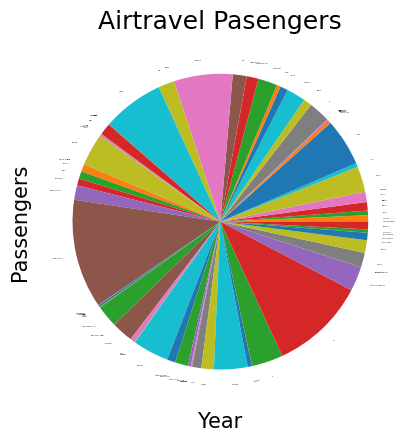

In [ ]:
pd.a = df.groupby("Country").size()
a.sort_values(ascending=False)
a.plot.pie()
plt.title("Airtravel Pasengers", fontsize=18)
plt.grid(False)
plt.show()

pie chart of travel distribution in 1985

<AxesSubplot:ylabel='None'>

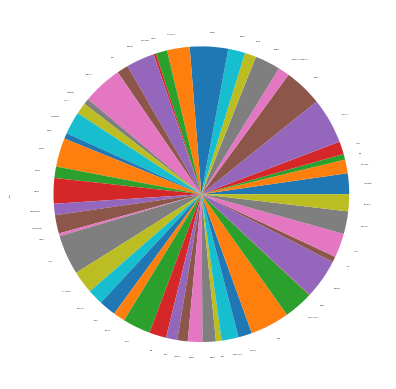

In [ ]:
# Creates a data frame with just the relevant columns
dfpie = df_long_lat[["Year", "ForeignPort"]]
# just shows data in the column where year == 1985
dataforpie = dfpie[(df_long_lat.Year == 1985)]
# groups the data by the size of the port
e = dataforpie.groupby("ForeignPort").size()
e.plot.pie()

Plots the Passengers

Shows the increase in passengers and then decrease when COVID hit

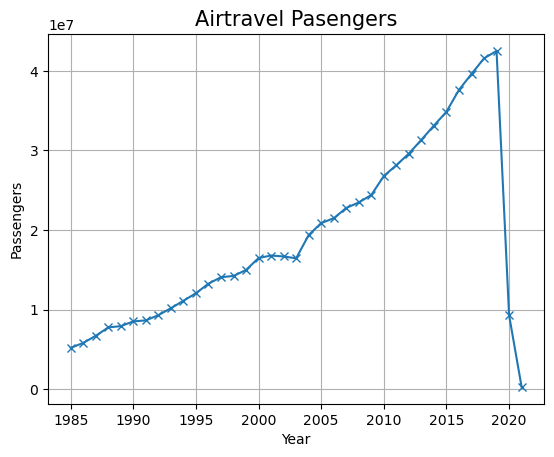

In [45]:
pass_total = df[["Year","Passengers_Total"]].groupby("Year").sum()

plt.rcdefaults()
plt.plot(pass_total, "x-")
plt.title("Airtravel Pasengers", fontsize=15)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Passengers', fontsize=10)
plt.grid(True)
plt.show()

Most popular domestic airport

In [ ]:
pd.most_pop_dom_port = df.AustralianPort.value_counts(dropna=False)
most_pop_dom_port.plot.bar()
plt.title("Most Popular Domestic Airports", fontsize=18)
plt.xlabel('Airport', fontsize=15)
plt.ylabel('Frequency of Appearance', fontsize=15)
plt.show()

Freight In/Out

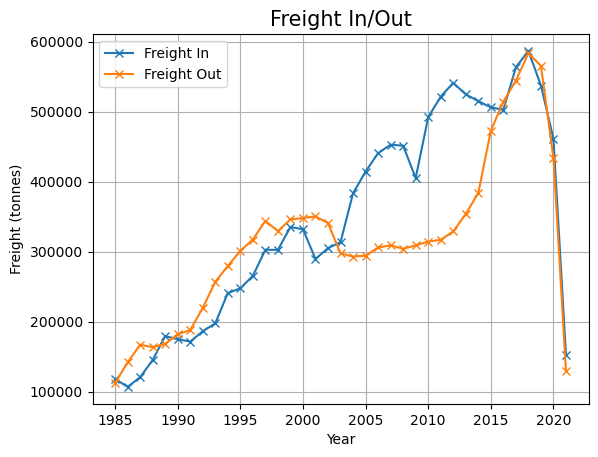

In [71]:
Freight_In = df[["Year","Freight_In_(tonnes)"]].groupby("Year").sum()
Freight_Out = df[["Year","Freight_Out_(tonnes)"]].groupby("Year").sum()

plt.rcdefaults()
plt.plot(Freight_In, "x-", label = "Freight In")
plt.plot(Freight_Out, "x-", label = "Freight Out")
plt.title("Freight In/Out", fontsize=15)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Freight (tonnes)', fontsize=10)
plt.legend()
plt.grid(True)
plt.show()

Mail In/Out

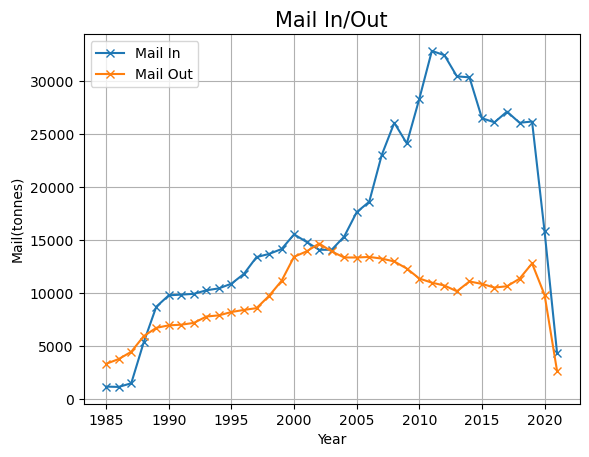

In [72]:
mail_in = df[["Year","Mail_In_(tonnes)"]].groupby("Year").sum()
mail_out = df[["Year","Mail_Out_(tonnes)"]].groupby("Year").sum()

plt.rcdefaults()
plt.plot(mail_in, "x-", label = "Mail In")
plt.plot(mail_out, "x-", label = "Mail Out")
plt.title("Mail In/Out", fontsize=15)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Mail(tonnes)', fontsize=10)
plt.legend()
plt.grid(True)
plt.show()

# 5. Maps

loads the world map and cites dataset

In [ ]:
 world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
 cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

Shows the world map
no data

In [ ]:
world.plot()


This code maps the long and lat data onto a world map

In [ ]:
# port_df = data frame with long/lat + name + location - only has unique cities
# long_lat = data frame with just unique long/lat
# df_long_lat = big data frame now containing the long and lat - takes longer if its used
# the data frame with the long and lat coordinates
data = port_df
# tells python the coordinate system
crs={'init':'epsg:4326'}
# defines the geometry
geometry = [Point(xy) for xy in zip(data["longitude"], data["latitude"])]
# loads data from geopandas
geodata = gpd.GeoDataFrame(data,crs=crs, geometry=geometry)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Formatting stuff is below like colour, text etc
fig, ax = plt.subplots(figsize=(15,7))

world.plot(ax=ax, facecolor='Grey', edgecolor='k',alpha=1,linewidth=0.1,cmap="Blues")

geodata.plot(ax=ax, color='red', markersize=5)  

fig.suptitle('Destinations in 2019', fontsize=12)
ax.set_xlabel('Longitude', fontsize=10)
ax.set_ylabel('Latitude', fontsize='medium')

Destinations in 1985

C:\Users\Anthony\anaconda3\lib\site-packages\pyproj\crs\crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


Text(129.14638006484876, 0.5, 'Latitude')

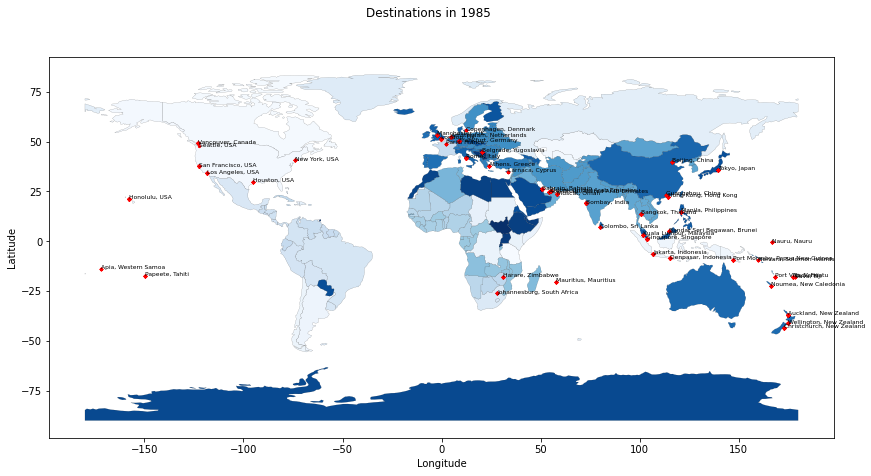

In [7]:
# port_df = data frame with long/lat + name + location - only has unique cities
# long_lat = data frame with just unique long/lat
# df_long_lat = big data frame now containing the long and lat - takes longer if its used
# the data frame with the long and lat coordinates 
data = df_long_lat[(df_long_lat.Year == 1985)]

# tells python the coordinate system
crs ={'init':'epsg:4326'}
# defines the geometry
geometry = [Point(xy) for xy in zip(data["longitude"], data["latitude"])]

# loads data from geopandas
geodata = gpd.GeoDataFrame(data,crs=crs, geometry=geometry)


world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Formatting stuff is below like colour, text etc
fig, ax = plt.subplots(figsize=(15,7))

world.plot(ax=ax, facecolor='Grey', edgecolor='k',alpha=1,linewidth=0.1,cmap="Blues")

port_geo = data[["port", "geometry","longitude","latitude"]]
text_unique = []
for idx, row in port_geo.iterrows():
    #the if statement avoids duplicate names
    if row.port in text_unique:
        continue
    else:
        plt.annotate(text=row.port, xy=tuple(row.geometry.coords)[0], xycoords='data', fontsize=6)
        text_unique.append(row.port)
 
#cmaps is the colour map - can check matplotlib for all the colour maps 

geodata.plot(ax=ax, color='red', markersize=5)  
fig.suptitle('Destinations in 1985', fontsize=12)
ax.set_xlabel('Longitude', fontsize=10)
ax.set_ylabel('Latitude', fontsize='medium')

Destinations in 2019

C:\Users\Anthony\anaconda3\lib\site-packages\pyproj\crs\crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


Text(130.45919328803495, 0.5, 'Latitude')

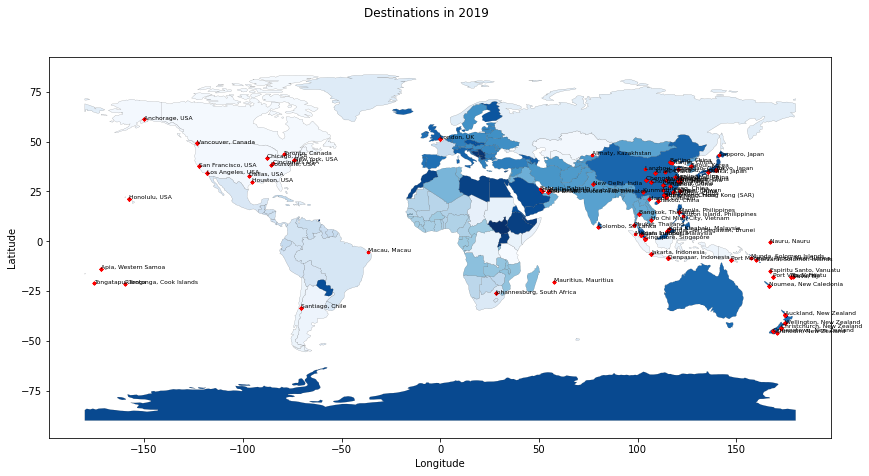

In [43]:
# port_df = data frame with long/lat + name + location - only has unique cities
# long_lat = data frame with just unique long/lat
# df_long_lat = big data frame now containing the long and lat - takes longer if its used
# the data frame with the long and lat coordinates 
data = df_long_lat[(df_long_lat.Year == 2019)]

# tells python the coordinate system
crs ={'init':'epsg:4326'} 
# defines the geometry
geometry = [Point(xy) for xy in zip(data["longitude"], data["latitude"])]

# loads data from geopandas
geodata = gpd.GeoDataFrame(data,crs=crs, geometry=geometry)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Formatting stuff is below like colour, text etc
fig, ax = plt.subplots(figsize=(15,7))

world.plot(ax=ax, facecolor='Grey', edgecolor='k',alpha=1,linewidth=0.1,cmap="Blues")

port_geo = data[["port", "geometry","longitude","latitude"]]
text_unique = []
for idx, row in port_geo.iterrows():
    #the if statement avoids duplicate names
    if row.port in text_unique:
        continue
    else:
        plt.annotate(text=row.port, xy=tuple(row.geometry.coords)[0], xycoords='data', fontsize=6)
        text_unique.append(row.port)



#change markersize to be proportional to value counts

# # datab = data.ForeignPort.value_counts(dropna=False)
# data['values'] = data.groupby("port").size()
# # cities.plot(markersize=cities['values'])
# just_counts = data.port
# df_just_counts = just_counts.value_counts().rename_axis('unique_values').to_frame('counts')


#cmaps is the colour map - can check matplotlib for all the colour maps 

geodata.plot(ax=ax, color='red', markersize=5)  
fig.suptitle('Destinations in 2019', fontsize=12)
ax.set_xlabel('Longitude', fontsize=10)
ax.set_ylabel('Latitude', fontsize='medium')

unique_values
Singapore, Singapore          108
Denpasar, Indonesia            96
Auckland, New Zealand          92
Hong Kong, Hong Kong (SAR)     84
Kuala Lumpur, Malaysia         72
                             ... 
Luzon Island, Philippines       3
Ningbo, China                   2
Bahrain, Bahrain                2
Medan, Indonesia                2
Cincinnati, USA                 1
Name: counts, Length: 81, dtype: int64